## Machine Learning -1 Graded Project

### Clustering:

Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

### The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

In [52]:
## Import Libraries and load data 
 
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

## Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [53]:
data = pd.read_excel("Clustering+Clean+Ads_Data.xlsx")


In [54]:
data.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [55]:
data.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

### Checking for Summary Statistic

In [57]:
data.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


### Checking for null values

In [58]:
data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

### Checking for duplicates 

In [59]:
data.duplicated().sum()

0

### Treating missing values in CPC, CTR and CPM 

In [60]:
def calculate_mis_ctr(ctr):

    IMP=data.Impressions
    CLI=data.Clicks
    SPE=data.Spend

    a=CLI/IMP*100
    b=(SPE/IMP)*1000
    c=SPE/CLI

    return a

def calculate_mis_cpm(cpm):

    IMP=data.Impressions
    CLI=data.Clicks
    SPE=data.Spend

    a=CLI/IMP*100
    b=(SPE/IMP)*1000
    c=SPE/CLI

    return b

def calculate_mis_cpc(cpc):

    IMP=data.Impressions
    CLI=data.Clicks
    SPE=data.Spend

    a=CLI/IMP*100
    b=(SPE/IMP)*1000
    c=SPE/CLI

    return c

In [61]:
data['CTR'] =data[['CTR']].apply(lambda ctr: calculate_mis_ctr(ctr))

In [62]:
data['CPM'] =data[['CPM']].apply(lambda cpm: calculate_mis_cpm(cpm))

In [63]:
data['CPC'] =data[['CPC']].apply(lambda cpc: calculate_mis_cpc(cpc))

In [64]:
data.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### There is no null values now

In [65]:
data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0


### Categorical Values 

In [66]:
 data['InventoryType'].value_counts()

Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64

In [67]:
#numerical 
#check the numerical data distribution

num=data[["Ad - Length","Ad- Width","Ad Size","Available_Impressions","Matched_Queries","Impressions","Clicks","Spend","Fee","Revenue","CTR","CPM","CPC"]]

In [68]:
#categorical 
#check the categorical datas distribution

cat=data[["InventoryType","Ad Type","Platform","Device Type","Format"]]

In [69]:
cat.head(5)

,InventoryType,Ad Type,Platform,Device Type,Format
0,Format1,Inter222,Video,Desktop,Display
1,Format1,Inter227,App,Mobile,Video
2,Format1,Inter222,Video,Desktop,Display
3,Format1,Inter228,Video,Mobile,Video
4,Format1,Inter217,Web,Desktop,Video


In [70]:
num.head(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0


### Outlier Treatment

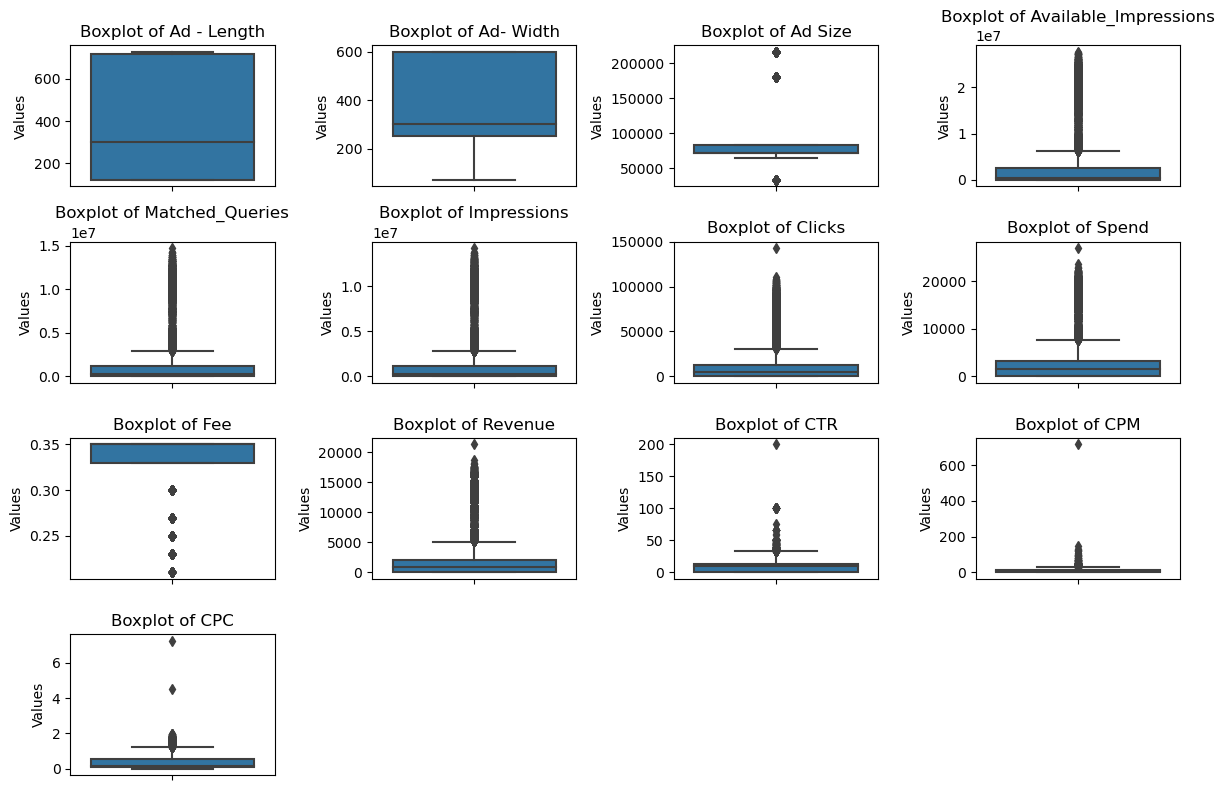

In [71]:
feature_list = num.columns

#Create the subplot grid
fig,axs = plt.subplots(4,4,figsize = (12,8))
axs = axs.flatten()

for i, feature in enumerate(feature_list):
    sns.boxplot(y=num[feature], ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature}')
    axs[i].set_ylabel('Values')
    
for j in range(i+1,len(axs)):
    axs[j].axis('off')
    
plt.tight_layout()
plt.show()

### all the Columns are have outliers so we need to reduse the outliers for the calculations using IQR

In [72]:
##USING IQR 
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [73]:
def remove_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

# Iterate over each feature in the feature list
for feature in feature_list:
    lower_limit, upper_limit = remove_outlier(num[feature])
    num.loc[num[feature] > upper_limit, feature] = upper_limit
    num.loc[num[feature] < lower_limit, feature] = lower_limit


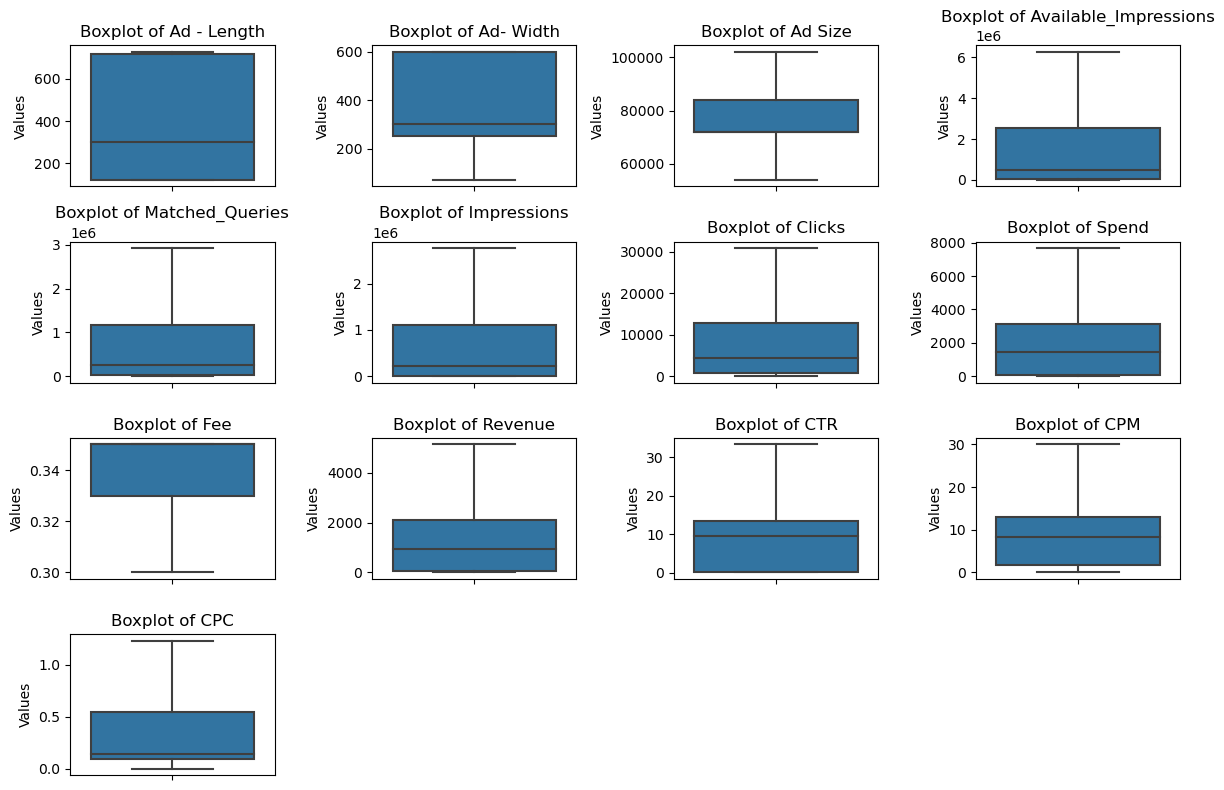

In [74]:
feature_list = num.columns

#Create the subplot grid
fig,axs = plt.subplots(4,4,figsize = (12,8))
axs = axs.flatten()

for i, feature in enumerate(feature_list):
    sns.boxplot(y=num[feature], ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature}')
    axs[i].set_ylabel('Values')
    
for j in range(i+1,len(axs)):
    axs[j].axis('off')
    
plt.tight_layout()
plt.show()

In [75]:
num.tail()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,720,300,102000,1,1.0,1.0,1.0,0.07,0.35,0.0455,33.278766,29.981418,0.07
23062,720,300,102000,3,2.0,2.0,1.0,0.04,0.35,0.0260,33.278766,20.000000,0.04
23063,720,300,102000,2,1.0,1.0,1.0,0.05,0.35,0.0325,33.278766,29.981418,0.05
23064,120,600,72000,7,1.0,1.0,1.0,0.07,0.35,0.0455,33.278766,29.981418,0.07
23065,720,300,102000,2,2.0,2.0,1.0,0.09,0.35,0.0585,33.278766,29.981418,0.09


In [76]:
num=num.astype(float)

In [77]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  float64
 1   Ad- Width              23066 non-null  float64
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


## Scaling the data

In [78]:
# importing Standard Scaler
from sklearn.preprocessing import StandardScaler

X = StandardScaler()

scaled_df = X.fit_transform(num)

In [79]:
scaled_df

array([[-0.3644957 , -0.43279676, -0.10251846, ..., -0.95883633,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.95383476,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.96221767,
        -1.19449791, -1.04256138],
       ...,
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.88461411],
       [-1.13489073,  1.29058999, -0.29756446, ...,  3.03580766,
         3.16271759, -0.82143521],
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.7582563 ]])

# Hierarchical Clustering

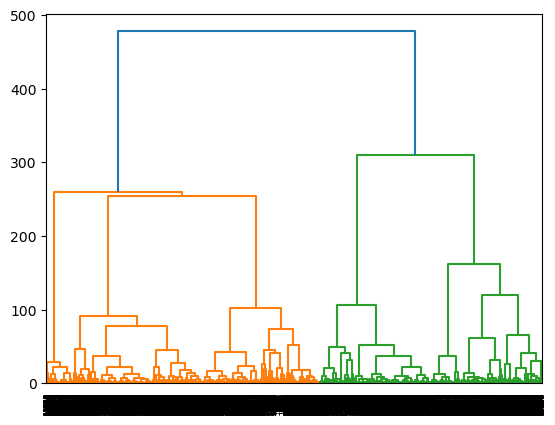

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix using Ward's method
Z = linkage(scaled_df, method='ward')

# Generate the dendrogram
dend = dendrogram(Z)


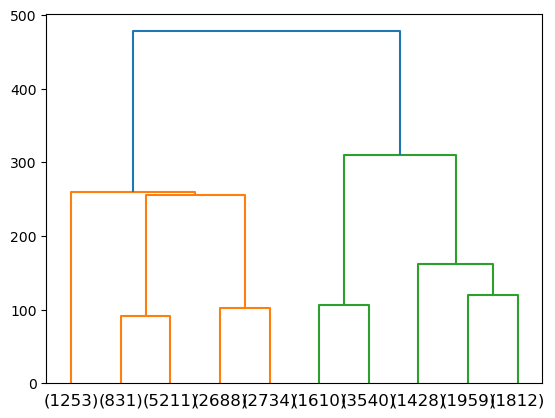

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'scaled_df' is your scaled dataset and 'p' is the number of clusters to display
wardlink = linkage(scaled_df, method='ward')

# Create the dendrogram
dend = dendrogram(wardlink, truncate_mode='lastp', p=10)

# Show the dendrogram
plt.show()


## K-means Clustering

In [82]:
#import the library
from sklearn.cluster import KMeans

In [83]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)


C:\Users\suraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [84]:
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [85]:
k_means.inertia_


183349.10202886089

In [86]:
wss=[]

In [35]:
for i in range(1, 10):
    KM = KMeans(n_clusters=i, n_init=10)  # Explicitly setting n_init to suppress the warning
    KM.fit(scaled_df)
    wss.append(KM.inertia_)


In [36]:
wss

[299858.0000000003,
 183349.1043840474,
 130878.35494264905,
 95133.93066619671,
 61539.18919785387,
 51676.89230709958,
 44598.26211613907,
 39597.96169127755,
 36061.73282990739]

## Plotting the Elbow Curve 

In [47]:
a=[1,2,3,4,5,6,7,8,9,10]

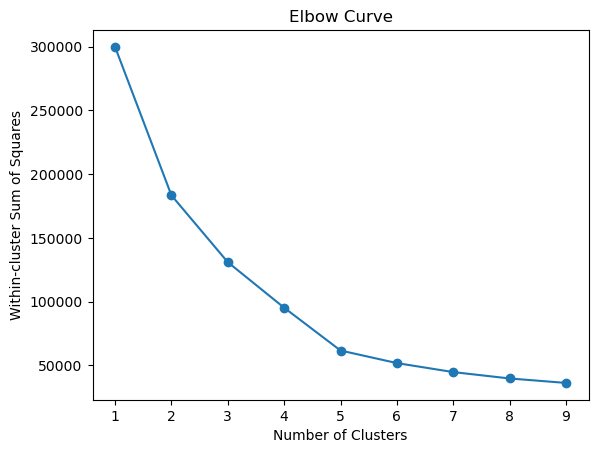

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

wss = [299857.99999999866,
 183349.10202886112,
 130878.34788742894,
 95133.93066619692,
 61539.18919785395,
 51676.92090805334,
 44598.25849746805,
 39597.84955874646,
 36101.29702477825]

a = list(range(1, len(wss) + 1))  # Number of clusters

plt.plot(a, wss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Curve')
plt.show()


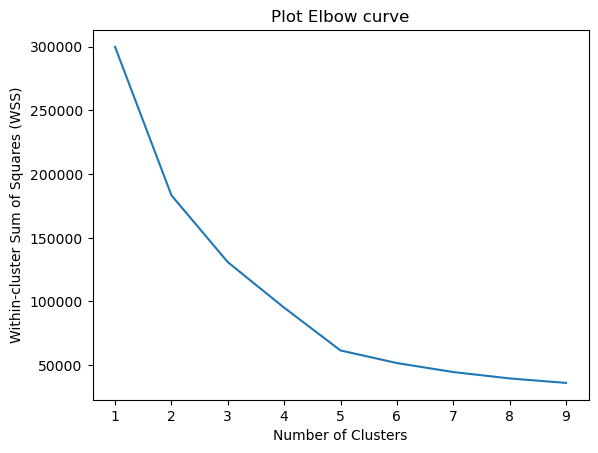

In [37]:
import matplotlib.pyplot as plt

plt.title("Plot Elbow curve")
plt.plot(range(1, 10), wss)  # Range adjusted to match the length of wss
plt.xlabel("Number of Clusters")
plt.ylabel("Within-cluster Sum of Squares (WSS)")
plt.show()


## Silhouette Analysis

In [43]:
#import the library
from sklearn.metrics import silhouette_samples, silhouette_score

In [44]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

C:\Users\suraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
labels

array([2, 2, 2, ..., 0, 0, 0])

In [46]:
silhouette_score(scaled_df,labels,random_state=1)

0.44534519247649795

In [79]:
# Kmeans = 5

k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
labels = k_means.labels_
silhouette_score(scaled_df,labels)

0.5240956940501831

In [82]:
sil_width = silhouette_samples(scaled_df,labels)

## Silhouette Analysis 

Find Silhouette Score for the Values of K from 2 to 10

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    # Initialize KMeans with n_init parameter explicitly set
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, n_init=10)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters = {}, the silhouette score is {:.4f}".format(num_clusters, silhouette_avg))


For n_clusters = 2, the silhouette score is 0.3857
For n_clusters = 3, the silhouette score is 0.3825
For n_clusters = 4, the silhouette score is 0.4453
For n_clusters = 5, the silhouette score is 0.5241
For n_clusters = 6, the silhouette score is 0.5221
For n_clusters = 7, the silhouette score is 0.5166
For n_clusters = 8, the silhouette score is 0.4797
For n_clusters = 9, the silhouette score is 0.4306
For n_clusters = 10, the silhouette score is 0.4281


In [89]:
# Insert the cluster values and silhouette scores into the dataset
data["Clus_kmeans"] = cluster_labels
data["silhouette_score"] = silhouette_avg

# Display the first 5 rows of the updated dataset
print(data.head(5))


     Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  ...  Impressions  \
0    Video     Desktop  Display                   1806  ...          323   
1      App      Mobile    Video                   1780  ...          285   
2    Video     Desktop  Display                   2727  ...          355   
3    Video      Mobile    Video                   2430  ...          495   
4      Web     Desktop    Video                   1218  ...          242   

   Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  Clus_kmeans  \
0       1    0.0  0.35  

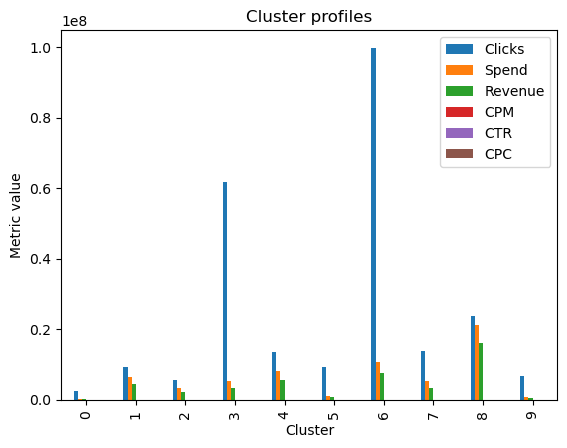

In [92]:
# Group the ads by cluster
clustered_ads = data.groupby('Clus_kmeans')

# Calculate the sum or mean of clicks, spend, revenue, CPM, CTR, and CPC based on device type
cluster_profiles = clustered_ads.agg({'Clicks': 'sum', 'Spend': 'sum', 'Revenue': 'sum', 
                                      'CPM': 'mean', 'CTR': 'mean', 'CPC': 'mean'})

# Create a bar plot of the cluster profiles
cluster_profiles.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Metric value')
plt.title('Cluster profiles')
plt.show()


# Problem 2 

### PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [93]:
import pandas as pd
data = pd.read_excel('PCA+India+Data_Census.xlsx')
data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [95]:
data.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [2]:
df.shape

(640, 61)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [5]:
# Step 1: Check shape, data types, and statistical summary
print("Shape of the dataset:", data.shape)
print("\nData types:")
print(data.dtypes)
print("\nStatistical summary:")
print(data.describe())

Shape of the dataset: (640, 61)

Data types:
State Code        int64
Dist.Code         int64
State            object
Area Name        object
No_HH             int64
                  ...  
MARG_HH_0_3_F     int64
MARG_OT_0_3_M     int64
MARG_OT_0_3_F     int64
NON_WORK_M        int64
NON_WORK_F        int64
Length: 61, dtype: object

Statistical summary:
       State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   51222.871875   79940.576563  122372.084375   
std      9.426486  184.896367   48135.405475   73384.511114  113600.717282   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  

### Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [98]:
# Step 2: Select 5 variables for analysis
selected_variables = ['State', 'Area Name', 'No_HH', 'TOT_M', 'TOT_F']

# Step 3: Analyze the selected variables
selected_data = data[selected_variables]

## Which state has the highest gender ratio and which has the lowest?


State with the highest gender ratio: Lakshadweep
State with the lowest gender ratio: Andhra Pradesh


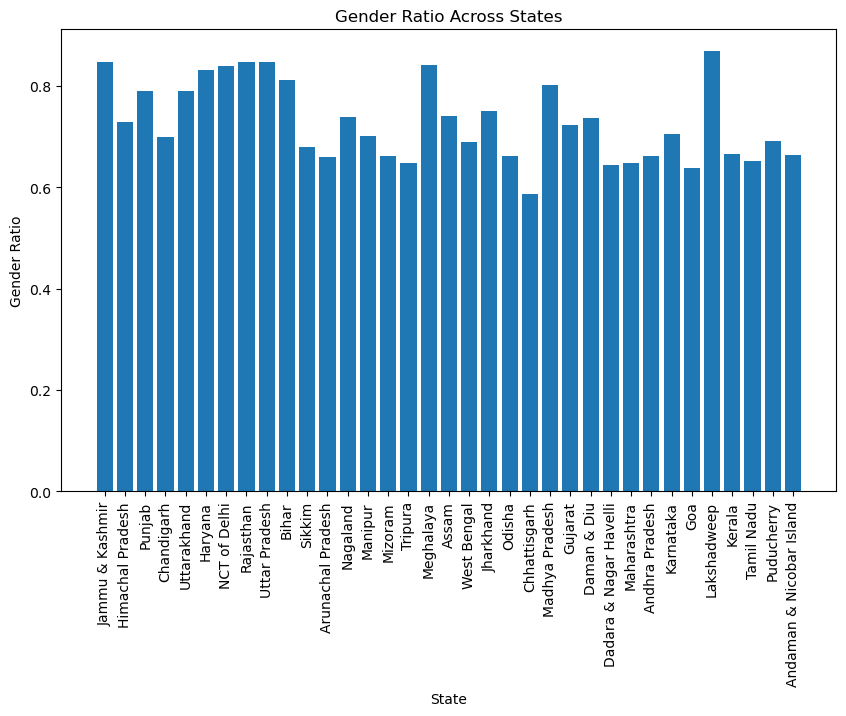

In [99]:
# Calculate gender ratio for all states
gender_ratio = selected_data['TOT_M'] / selected_data['TOT_F']

# Find state with the highest and lowest gender ratio
state_highest_ratio = selected_data.loc[gender_ratio.idxmax(), 'State']
state_lowest_ratio = selected_data.loc[gender_ratio.idxmin(), 'State']

print("\nState with the highest gender ratio:", state_highest_ratio)
print("State with the lowest gender ratio:", state_lowest_ratio)

# Plotting the gender ratio for all states
plt.figure(figsize=(10, 6))
plt.bar(selected_data['State'], gender_ratio)
plt.xlabel('State')
plt.ylabel('Gender Ratio')
plt.title('Gender Ratio Across States')
plt.xticks(rotation=90)
plt.show()


## Which district has the highest & lowest gender ratio? 

In [102]:
district_gender_ratio = selected_data['TOT_M'] / selected_data['TOT_F']
district_highest_ratio = selected_data.loc[district_gender_ratio.idxmax(), 'Area Name']
district_lowest_ratio = selected_data.loc[district_gender_ratio.idxmin(), 'Area Name']
print("\nDistrict with the highest gender ratio:", district_highest_ratio)
print("District with the lowest gender ratio:", district_lowest_ratio)


District with the highest gender ratio: Lakshadweep
District with the lowest gender ratio: Krishna


## Problem 2 - Data Preprocessing 

## - Check for and treat (if needed) missing values - Check for and treat (if needed) data irregularities - Scale the Data using the z-score method - Visualize the data before and after scaling and comment on the impact on outliers 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Step 1: Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)



Missing values:
 State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64


In [17]:
# Step 2: Check for data irregularities (if needed)
# Example: Check data types
print("\nData types:\n", data.dtypes)




Data types:
 State Code        int64
Dist.Code         int64
State            object
Area Name        object
No_HH             int64
                  ...  
MARG_HH_0_3_F     int64
MARG_OT_0_3_M     int64
MARG_OT_0_3_F     int64
NON_WORK_M        int64
NON_WORK_F        int64
Length: 61, dtype: object


In [19]:
# Step 3: Scale the data using z-score method
# Select numerical columns to scale
numerical_columns = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']  # Example columns

# Apply z-score scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

scaled_df

,No_HH,TOT_M,TOT_F,M_06,F_06
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908
...,...,...,...,...,...
635,-0.995677,-0.978990,-0.974268,-0.971387,-0.948916
636,-0.844340,-0.921822,-0.886965,-0.936754,-0.919757
637,-1.038465,-1.069066,-1.054885,-1.051356,-1.035331
638,-0.986758,-1.019276,-1.007472,-1.008195,-0.996541


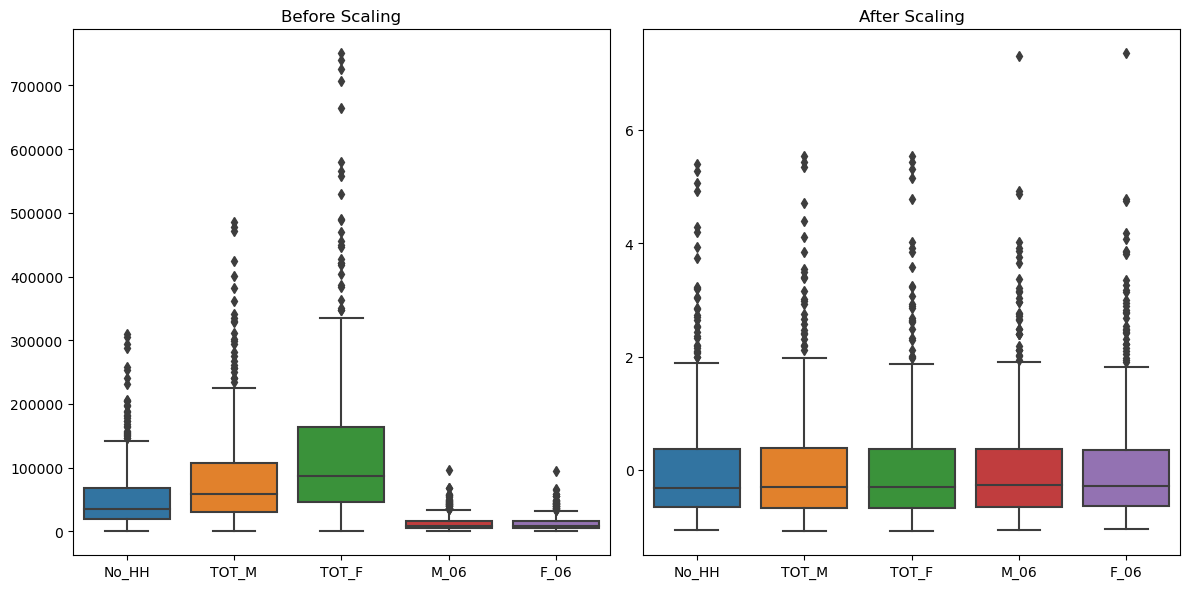

In [20]:
# Step 4: Visualize the data before and after scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data[numerical_columns])
plt.title('Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_df)
plt.title('After Scaling')

plt.tight_layout()
plt.show()


## Problem 2 - PCA
- Create the covariance matrix - Get eigen values and eigen vectors - Identify the optimum number of PCs - Show Scree plot - Compare PCs with Actual Columns and identify which is explaining most variance - Write inferences about all the PCs in terms of actual variables - Write linear equation for first PC Note: For the scope of this project, take at least 90% explained variance.

In [103]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the covariance matrix
cov_matrix = np.cov(scaled_df.T)

# Step 2: Get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3: Identify the optimum number of PCs
total_variance = sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)



In [104]:
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Create the PCA object
pca = PCA()

# Step 2: Fit the PCA model to the scaled data
pca.fit(scaled_df)

# Step 3: Print the eigenvalues and eigenvectors
print("Eigenvalues:")
print(pca.explained_variance_)
print("\nEigenvectors:")
print(pca.components_)


Eigenvalues:
[6.95495130e+00 2.60273066e+00 1.61839101e+00 6.93356489e-01
 4.32367815e-01 3.14770773e-01 1.60098486e-01 1.13701628e-01
 6.98689613e-02 2.94153034e-02 1.05869964e-02 1.94454700e-04
 1.29742820e-04]

Eigenvectors:
[[ 1.18809362e-01 -2.31809100e-01 -1.14317007e-01  3.57325084e-01
   3.60815462e-01  3.59724633e-01  1.13798016e-01  3.16716970e-01
  -2.79473590e-01  3.15381633e-01 -2.80450757e-01 -2.66069848e-01
   3.02544530e-01]
 [-1.06216001e-01  3.28710634e-01  2.18224473e-01 -1.55363769e-02
   2.96038999e-03 -6.05222833e-03  4.71780611e-01  3.27743391e-01
  -3.61187974e-01  3.31901073e-01  3.14065521e-01  3.49184688e-01
  -2.03921405e-01]
 [ 7.00418360e-01 -3.55305351e-01  5.18121342e-01 -7.09716301e-02
  -8.13653182e-02 -8.33065035e-02  2.74906529e-01 -1.28065095e-02
   1.16961648e-01 -1.94174397e-02 -1.28094435e-03 -3.93706350e-02
  -6.91294781e-02]
 [-4.20850029e-02  3.01578365e-01  6.30133860e-01  2.60696934e-01
   2.87852922e-01  2.99833815e-01 -4.22439570e-01 -1.19

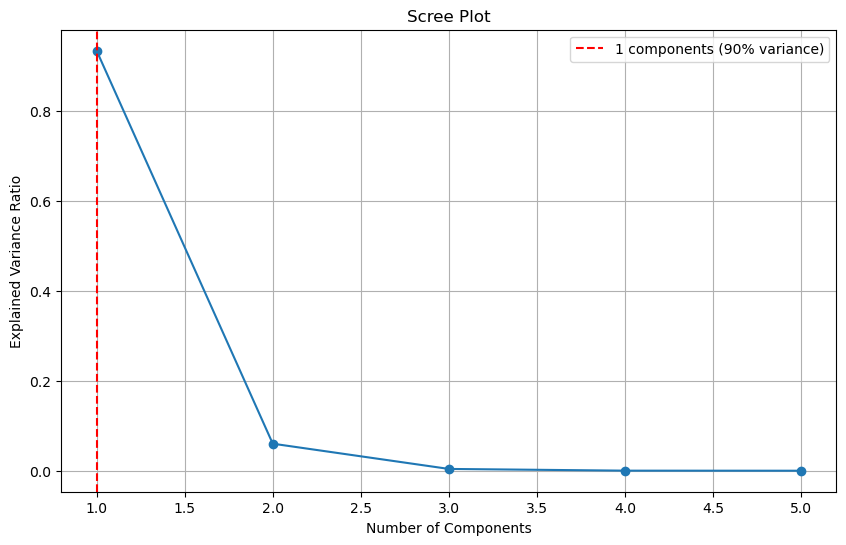

In [23]:
# Find the number of components needed to explain at least 90% variance
num_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1

# Step 4: Show Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.axvline(x=num_components_90, color='r', linestyle='--', label=f'{num_components_90} components (90% variance)')
plt.legend()
plt.grid(True)
plt.show()



In [25]:
# Step 5: Compare PCs with Actual Columns
pca = PCA(n_components=num_components_90)
pca.fit(scaled_df)
loadings = pca.components_

# Step 6: Write inferences about all the PCs in terms of actual variables
for i, pc in enumerate(loadings, start=1):
    print(f"Principal Component {i}:")
    for j, col in enumerate(scaled_df.columns):
        print(f"  {col}: {pc[j]}")




Principal Component 1:
  No_HH: 0.42857823607763434
  TOT_M: 0.4593623855765384
  TOT_F: 0.45632420259992235
  M_06: 0.44584832674987984
  F_06: 0.4453025779555879


In [26]:
# Step 7: Write linear equation for the first PC
first_pc = loadings[0]
linear_equation = ' + '.join([f'{first_pc[i]:.2f} * {col}' for i, col in enumerate(scaled_df.columns)])
print("\nLinear equation for the first PC:")
print(linear_equation)


Linear equation for the first PC:
0.43 * No_HH + 0.46 * TOT_M + 0.46 * TOT_F + 0.45 * M_06 + 0.45 * F_06
